In [1]:
# importing data
import pandas as pd
import numpy as np
np.random_state = 42
data = pd.read_csv('D:/MSBA/10 Applied Machine Learning/assignment/1/sgemm_product_dataset/sgemm_product.csv')
print(data.head())

   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  
0   0     115.26     115.87     118.55     115.80  
1   1      78.13      78.25      79.25      79.19  
2   0      79.84      80.69      80.76      80.97  
3   1      84.32      89.90      86.75      85.58  
4   0     115.13     121.98     122.73     114.81  


In [2]:
# creating target variable (average of 4 runtime)
data['av_run'] = data[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis = 1).round(2)
print(data[['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)','av_run']].head())

   Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  av_run
0     115.26     115.87     118.55     115.80  116.37
1      78.13      78.25      79.25      79.19   78.70
2      79.84      80.69      80.76      80.97   80.56
3      84.32      89.90      86.75      85.58   86.64
4     115.13     121.98     122.73     114.81  118.66


In [3]:
# dropping 4 obselete run columns
data.drop(columns=['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], inplace = True)
data.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'av_run'],
      dtype='object')

In [4]:
# converting av_run into binary variable
import numpy as np
y_median = np.median(data['av_run'])
data['av_run_binary'] = [1 if i > y_median else 0 for i in data['av_run']]
print(data[['av_run','av_run_binary']].head())

   av_run  av_run_binary
0  116.37              1
1   78.70              1
2   80.56              1
3   86.64              1
4  118.66              1


In [5]:
# creating X and y varible from data
X = data.iloc[:,:-2]
y = data.iloc[:,-1]
print(X.shape)

(241600, 14)


# Task 1: running clustering algorithm in above dataset

In [7]:
# clustering dataset using k-means
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(42)

clust = KMeans()

rmse = []

for k in range(2,10):
    clust.set_params(n_clusters = k)
    clust.fit(X)
    rmse.append(np.sqrt(clust.inertia_))

print(rmse)

[24034.898763696736, 18744.748084553696, 13860.570019569743, 12813.14229981267, 12022.04282514207, 11175.07994530023, 10570.238049239617, 9845.99437049469]


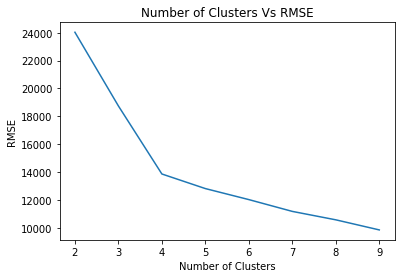

In [21]:
# plotting elbow curve between number of clusters and rmse
import matplotlib.pyplot as plt
def plot_line(x,y,title,ylabel,xlabel):
    plt.plot(x,y)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
plot_line(range(2,10),rmse,'Number of Clusters Vs RMSE','RMSE','Number of Clusters')

# Feature Selection Algorithm: Decision Tree

In [61]:
# feature selection through decision tree
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [62]:
import pandas as pd
feature_imp = pd.DataFrame({'name':X.columns, 'score':dt_clf.feature_importances_})
print(feature_imp.sort_values('score', ascending = False))

     name     score
0     MWG  0.270352
1     NWG  0.170793
4   NDIMC  0.151463
3   MDIMC  0.151380
12     SA  0.053769
10   STRM  0.043231
8     VWM  0.037922
13     SB  0.030403
9     VWN  0.026270
2     KWG  0.022784
6   NDIMB  0.011721
5   MDIMA  0.011331
11   STRN  0.009589
7     KWI  0.008992


In [63]:
# selecting top features based on above table
X_sub = X[['MWG','NWG','MDIMC','NDIMC']]
X_sub.shape

(241600, 4)

In [79]:
# making cluster with just above features
def clustering(X):
    dr_clust = KMeans()
    rmse = []
    for k in range(2,10):
        dr_clust.set_params(n_clusters = k)
        dr_clust.fit(X)
        rmse.append(np.sqrt(dr_clust.inertia_))
    return rmse

dr_rmse = clustering(X_sub)
print(dr_rmse)

[22722.216729580105, 17035.705855585104, 11451.203154205981, 10166.473825843692, 9155.958524215484, 8019.09988357444, 7008.648650043647, 6044.264096950688]


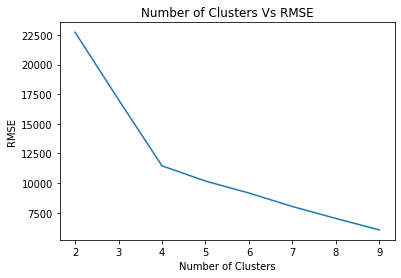

In [94]:
plot_line(range(2,10), dr_rmse,'Number of Clusters Vs RMSE','RMSE','Number of Clusters')

In [66]:
kmeans_comparision = pd.DataFrame({'Clusters':range(2,10),'Normal':rmse,'DR_dt':dr_rmse})
print(kmeans_comparision)

   Clusters        Normal         DR_dt
0         2  24034.898764  22722.216730
1         3  18744.748085  17035.705856
2         4  13860.570020  11451.203154
3         5  12813.142300  10166.473826
4         6  12022.042825   9155.958524
5         7  11175.079945   8019.099884
6         8  10570.238049   7008.648650
7         9   9845.994370   6044.264097


In [67]:
# function for adding column to a dataframe
def add_column(df,col_name, col):
    df[col_name] = col

# Dimensionality Reduction - PCA

In [72]:
# using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [73]:
pca.explained_variance_ratio_

array([4.53639997e-01, 4.52928645e-01, 2.52855826e-02, 2.10774165e-02,
       1.72858772e-02, 1.71234688e-02, 8.64408260e-03, 2.25738761e-03,
       7.53872687e-04, 7.52849140e-04, 6.27052115e-05, 6.27052115e-05,
       6.27052115e-05, 6.27052115e-05])

In [74]:
# as can be seen from above ratio top 2 companents explain 90% variance in data
pca = PCA(n_components = 2)
X_pca_transformed = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.45364   , 0.45292865])

In [84]:
# using transformed X_pca for clustering
pca_rmse = clustering(X_pca_transformed)
print(pca_rmse)

[22084.430102577528, 16169.017212474619, 10109.574041479926, 8620.563684669987, 7396.2202612989895, 5924.021443736378, 4453.9153987034115, 2684.161182990094]


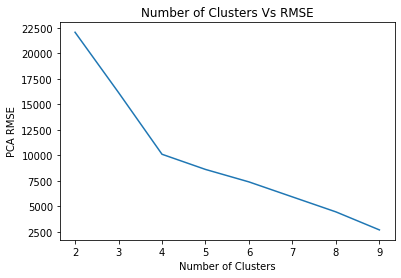

In [95]:
plot_line(range(2,10), pca_rmse,'Number of Clusters Vs RMSE','PCA RMSE','Number of Clusters')

In [83]:
# adding pca_rmse in DF with other RMSEs
add_column(kmeans_comparision,'pca_rmse', pca_rmse)
print(kmeans_comparision)

   Clusters        Normal         DR_dt      pca_rmse
0         2  24034.898764  22722.216730  22084.430103
1         3  18744.748085  17035.705856  16169.017212
2         4  13860.570020  11451.203154  10109.574041
3         5  12813.142300  10166.473826   8620.563685
4         6  12022.042825   9155.958524   7396.220261
5         7  11175.079945   8019.099884   5924.021444
6         8  10570.238049   7008.648650   4453.915399
7         9   9845.994370   6044.264097   2684.161183


# Dimensionality Reduction : ICA

In [8]:
# using ICA to find out important dimmensions from the dataset
from sklearn.decomposition import FastICA

ica = FastICA()
kmeans = KMeans()

ica_n_comp = []
ica_n_clust = []
ica_rmse = []

for n in range(2,14):
    ica.set_params(n_components = n)
    X_ica = ica.fit_transform(X)
    for k in range(2,10):
        kmeans.set_params(n_clusters = k)
        kmeans.fit(X_ica)
        ica_n_comp.append(n)
        ica_n_clust.append(k)
        ica_rmse.append(kmeans.inertia_)

In [9]:
ica_matrix = pd.DataFrame({'n_components':ica_n_comp, 'n_clusters':ica_n_clust, 'RMSE':ica_rmse})
print(ica_matrix.sort_values('RMSE'))

    n_components  n_clusters       RMSE
7              2           9   0.016501
6              2           8   0.045427
5              2           7   0.080376
4              2           6   0.125290
3              2           5   0.170203
..           ...         ...        ...
81            12           3  10.317061
90            13           4  10.678184
80            12           2  11.000000
89            13           3  11.317061
88            13           2  12.000000

[96 rows x 3 columns]


In [11]:
print(ica_matrix[ica_matrix['n_clusters']==4])

    n_components  n_clusters       RMSE
2              2           4   0.234078
10             3           4   1.232131
18             4           4   2.180420
26             5           4   3.073848
34             6           4   4.068928
42             7           4   4.804194
50             8           4   5.678296
58             9           4   6.793692
66            10           4   7.783388
74            11           4   8.791260
82            12           4   9.712817
90            13           4  10.678184


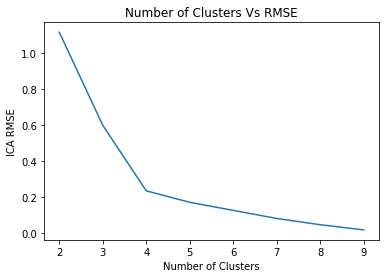

In [139]:
plot_line(range(2,10), ica_matrix[ica_matrix['n_components']==2]['RMSE'],'Number of Clusters Vs RMSE','ICA RMSE','Number of Clusters')

In [25]:
ica.set_params(n_components = 2)
X_ica = ica.fit_transform(X)

ica_rmse = []
for k in range(2,10):
        kmeans.set_params(n_clusters = k)
        kmeans.fit(X_ica)
        ica_rmse.append(kmeans.inertia_)

print(ica_rmse)

[1.117039269011213, 0.5987744840802407, 0.2340784613180868, 0.17020298291919755, 0.12528971888812496, 0.08037645485705242, 0.04542748386121196, 0.016501046413178337]


In [146]:
# adding ica rmse in DF with other RMSEs
add_column(kmeans_comparision,'ica_rmse', ica_matrix[ica_matrix['n_components']==2]['RMSE'])
print(kmeans_comparision)

   Clusters        Normal         DR_dt      pca_rmse  ica_rmse
0         2  24034.898764  22722.216730  22084.430103  1.117039
1         3  18744.748085  17035.705856  16169.017212  0.598774
2         4  13860.570020  11451.203154  10109.574041  0.234078
3         5  12813.142300  10166.473826   8620.563685  0.170203
4         6  12022.042825   9155.958524   7396.220261  0.125290
5         7  11175.079945   8019.099884   5924.021444  0.080376
6         8  10570.238049   7008.648650   4453.915399  0.045427
7         9   9845.994370   6044.264097   2684.161183  0.016501


# Dimenssionality Reduction: Randomized Projection

In [12]:
# using gaussian random projection to reduce dimmension of dataset and testing with k-means to find optinal n_components
from sklearn.random_projection import GaussianRandomProjection

transformer = GaussianRandomProjection()
kmeans = KMeans()

n_comp = []
n_clust = []
grp_rmse = []

for n in range(2,14):
    transformer.set_params(n_components = n)
    X_grp = transformer.fit_transform(X)
    for k in range(2,10):
        kmeans.set_params(n_clusters = k)
        kmeans.fit(X_grp)
        n_comp.append(n)
        n_clust.append(k)
        grp_rmse.append(kmeans.inertia_)

In [15]:
grp_matrix = pd.DataFrame({'n_components':n_comp, 'n_clusters':n_clust, 'RMSE':grp_rmse})

In [16]:
print(grp_matrix.sort_values('RMSE'))

    n_components  n_clusters          RMSE
31             5           9  5.381072e+07
15             3           9  5.768651e+07
30             5           8  5.825637e+07
14             3           8  6.248454e+07
29             5           7  6.484042e+07
..           ...         ...           ...
64            10           2  5.332719e+08
1              2           3  5.573258e+08
17             4           3  6.247459e+08
0              2           2  9.253772e+08
16             4           2  9.503781e+08

[96 rows x 3 columns]


In [18]:
# from above matrix it can be seen rmse is minimum for n_components = 2
print(grp_matrix[grp_matrix['n_clusters'] == 3])

    n_components  n_clusters          RMSE
1              2           3  5.573258e+08
9              3           3  1.419144e+08
17             4           3  6.247459e+08
25             5           3  1.650152e+08
33             6           3  2.682028e+08
41             7           3  2.955438e+08
49             8           3  2.850796e+08
57             9           3  2.401506e+08
65            10           3  3.374863e+08
73            11           3  2.337026e+08
81            12           3  3.280007e+08
89            13           3  3.082981e+08


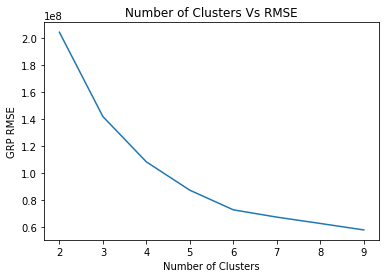

In [24]:
plot_line(range(2,10), grp_matrix[grp_matrix['n_components'] == 3]['RMSE'],'Number of Clusters Vs RMSE','GRP RMSE','Number of Clusters')

In [147]:
# adding GRP rmse in DF with other RMSEs
add_column(kmeans_comparision,'grp_rmse', grp_matrix[grp_matrix['n_components'] == 2]['RMSE'])
print(kmeans_comparision)

   Clusters        Normal         DR_dt      pca_rmse  ica_rmse      grp_rmse
0         2  24034.898764  22722.216730  22084.430103  1.117039  2.025747e+08
1         3  18744.748085  17035.705856  16169.017212  0.598774  1.086714e+08
2         4  13860.570020  11451.203154  10109.574041  0.234078  8.763914e+07
3         5  12813.142300  10166.473826   8620.563685  0.170203  7.178534e+07
4         6  12022.042825   9155.958524   7396.220261  0.125290  5.666276e+07
5         7  11175.079945   8019.099884   5924.021444  0.080376  4.862038e+07
6         8  10570.238049   7008.648650   4453.915399  0.045427  4.221055e+07
7         9   9845.994370   6044.264097   2684.161183  0.016501  3.741073e+07


# Task 4: Training Neural Network

In [17]:
# creating a neural network running function
from sklearn.neural_network import MLPClassifier

def run_nn(X_train, X_test, y_train,y_test):
    nn_clf = MLPClassifier()
    nn_clf.fit(X_train,y_train)
    training_accuracy = nn_clf.score(X_train,y_train)
    test_accuracy = nn_clf.score(X_test,y_test)
    return(training_accuracy,test_accuracy)
    

In [18]:
# training and testing accuracy for normal data (w/o any dimensionality reduction)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3)

print(X.shape, X_train.shape, X_test.shape)

(241600, 14) (169120, 14) (72480, 14)


In [157]:
print(run_nn(X_train, X_test, y_train,y_test))

(0.9804872280037843, 0.9786699779249448)


In [159]:
# training and testing data set for feature selected through decision tree 
X_train_dt = X_train[['MWG','NWG','MDIMC','NDIMC']]
X_test_dt = X_test[['MWG','NWG','MDIMC','NDIMC']]
print(X_train_dt.shape, X_test_dt.shape)

(169120, 4) (72480, 4)


In [160]:
# training and testing data for feature selected through PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

(169120, 2) (72480, 2)


In [170]:
# training and testing data for feature transformed through ICA
ica.set_params(n_components = 2)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

In [171]:
# traing and testing data for feature transformed through GRP
transformer.set_params(n_components = 2)
X_train_grp = transformer.fit_transform(X_train)
X_testr_grp = transformer.transform(X_test)

In [178]:
# running above different training and testing dataset through NN
X_train_lst = [X_train,X_train_dt, X_train_pca, X_train_ica, X_train_grp]
X_test_lst = [X_test, X_test_dt, X_test_pca, X_test_ica, X_testr_grp]

train_accu = []
test_accu = []

for i in range(5):
    nn_accu = run_nn(X_train_lst[i],X_test_lst[i],y_train,y_test)
    train_accu.append(nn_accu[0])
    test_accu.append(nn_accu[1])

In [181]:
# result comparision for transformed data
methodology = ['No Transformation','Fearure Selection: Decision Tree', 'PCA','ICA','RP - Gaussian Randmized Projections']

nn_results_comparision = pd.DataFrame({'Method': methodology,'Train Accuracy':train_accu, 'Test Accuracy':test_accu})
print(nn_results_comparision)

                                Method  Train Accuracy  Test Accuracy
0                    No Transformation        0.976762       0.975607
1     Fearure Selection: Decision Tree        0.886004       0.883568
2                                  PCA        0.736714       0.734423
3                                  ICA        0.731025       0.726642
4  RP - Gaussian Randmized Projections        0.705322       0.702911


# Task 5: applying neural network on clustering outcome

In [22]:
clust.set_params(n_clusters = 4)
y_predict = clust.fit_predict(X)
print(y_predict[:5])

[2 2 2 2 2]


In [23]:
#running NN on clustering output

X_train, X_test, y_train,y_test = train_test_split(y_predict,y,test_size = 0.3)

print(run_nn(X_train.reshape(-1,1),X_test.reshape(-1,1),y_train,y_test))

(0.7256090350047304, 0.7225855408388521)
